In [26]:
"""
 Created by quentincangelosi at 22.09.20
 From Global Advanced Analytics and Artificial Intelligence
"""
import numpy as np
import os
import pickle
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import seaborn as sb
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sb.set()
sb.set_style("darkgrid", {"axes.facecolor": ".9"})
sb.despine()
sb.set_context("talk")


<Figure size 432x288 with 0 Axes>

In [35]:
# Let's compare different solutions!

solutions_path = ["nn_18_9",
                  "nn_18_18",
                  "nn_20_15_8",
                  "double_q_learning_20_15_8",
                  "double_q_learning_learnevery20_20_15_8",
                  "double_q_learning_learnevery5_TAU5e-4_20_15_8",
                  "double_q_learning_learnevery5_TAU5e-3_20_15_8"
                  ]
df = pd.DataFrame()
for path in solutions_path:
    fn = f"{path}/scores.pickle"
    if os.path.exists(fn):
        with open(fn, "rb") as f:
            scores = pickle.load(f)
    _df = pd.DataFrame({"score": scores})
    _df["name"] = path
    _df["episode"] = _df.index + 1
    _df["rolling_score_100"] = _df["score"].rolling(100).mean()
    df = df.append(_df, ignore_index=True)
df.head()

,score,name,episode,rolling_score_100
0,0.0,nn_18_9,1,NaN
1,-1.0,nn_18_9,2,NaN
2,-1.0,nn_18_9,3,NaN
3,0.0,nn_18_9,4,NaN
4,2.0,nn_18_9,5,NaN


/Users/quentincangelosi/anaconda3/envs/rl/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='episode', ylabel='score'>

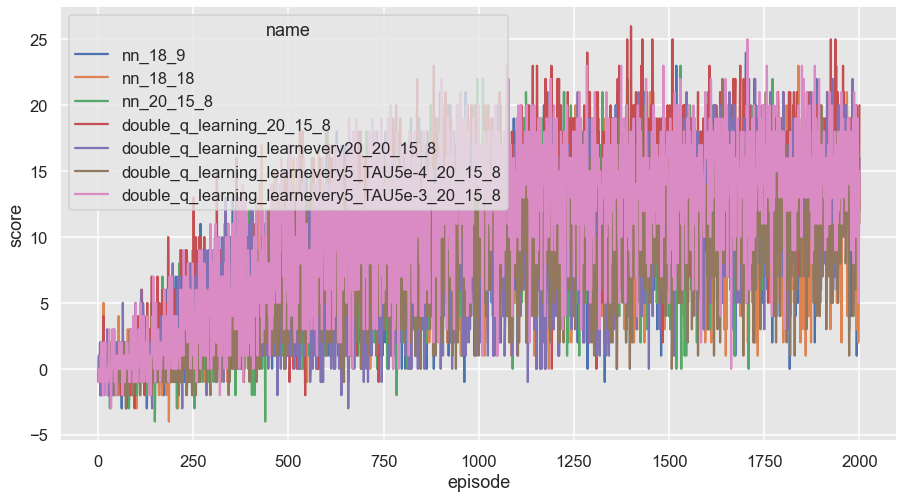

In [36]:
plt.figure(figsize=(15, 8))
sb.lineplot("episode", "score", hue="name", data=df)

/Users/quentincangelosi/anaconda3/envs/rl/lib/python3.6/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


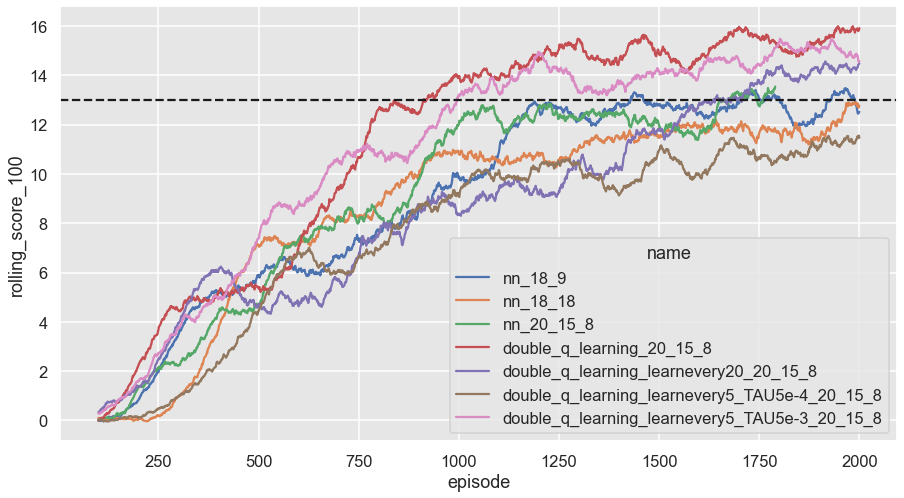

In [39]:
plt.figure(figsize=(15, 8))
sb.lineplot("episode", "rolling_score_100", hue="name", data=df)
plt.axhline(13, c="k", ls="--", label="Objective: 13")
plt.savefig("solutions_comparison_navigation.png",bbox_inches='tight')

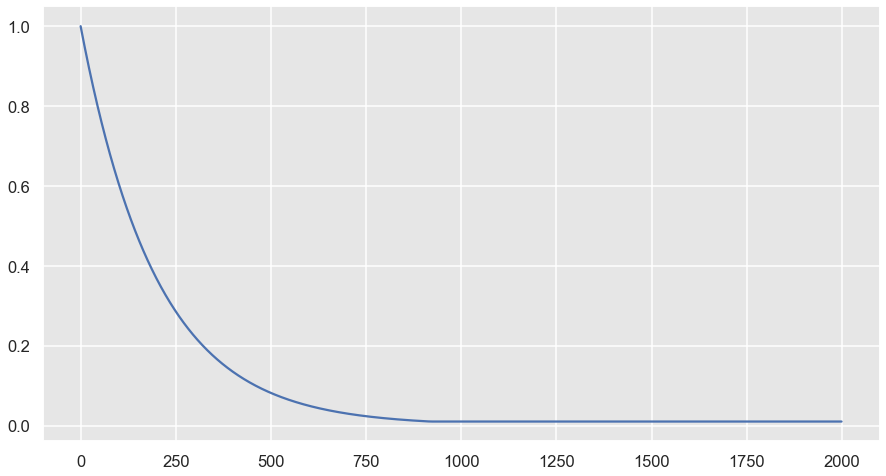

In [34]:
eps_start = 1
eps_decay = 0.995
eps_end = 0.01
n_episodes = 2000
epsilons = [max(eps_end, eps_start*(eps_decay**i)) for i in range(n_episodes)]
plt.figure(figsize=(15, 8))
plt.plot(epsilons)
plt.show()

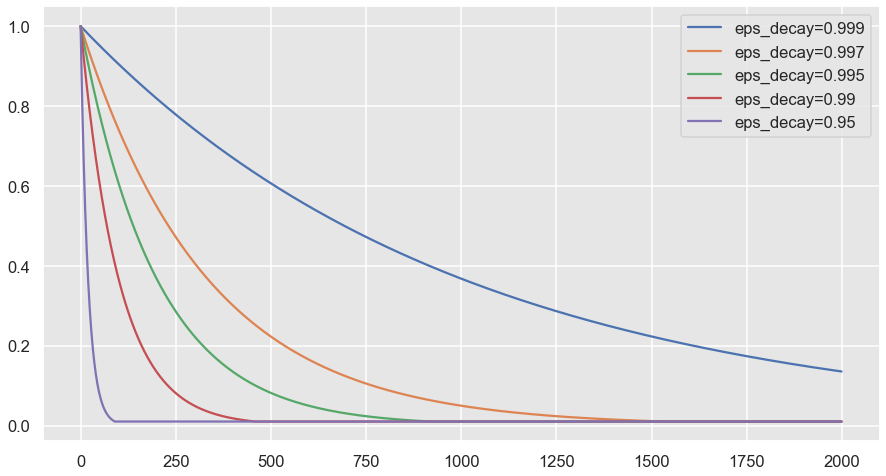

In [22]:
eps_start = 1
eps_end = 0.01
n_episodes = 2000
plt.figure(figsize=(15, 8))

for eps_decay in [0.999, 0.997, 0.995, 0.99, 0.95]: 
    epsilons = [max(eps_end, eps_start*(eps_decay**i)) for i in range(n_episodes)]
    plt.plot(epsilons, label=f"eps_decay={eps_decay}")
plt.legend()
plt.show()